In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [2]:
pip install gapminder

Note: you may need to restart the kernel to use updated packages.


In [3]:
from gapminder import gapminder

# TP_0

In [ ]:
datos_2002= gapminder[gapminder["year"] == 2002]
datos_2002.head()

,country,continent,year,lifeExp,pop,gdpPercap
10,Afghanistan,Asia,2002,42.129,25268405,726.734055
22,Albania,Europe,2002,75.651,3508512,4604.211737
34,Algeria,Africa,2002,70.994,31287142,5288.040382
46,Angola,Africa,2002,41.003,10866106,2773.287312
58,Argentina,Americas,2002,74.340,38331121,8797.640716


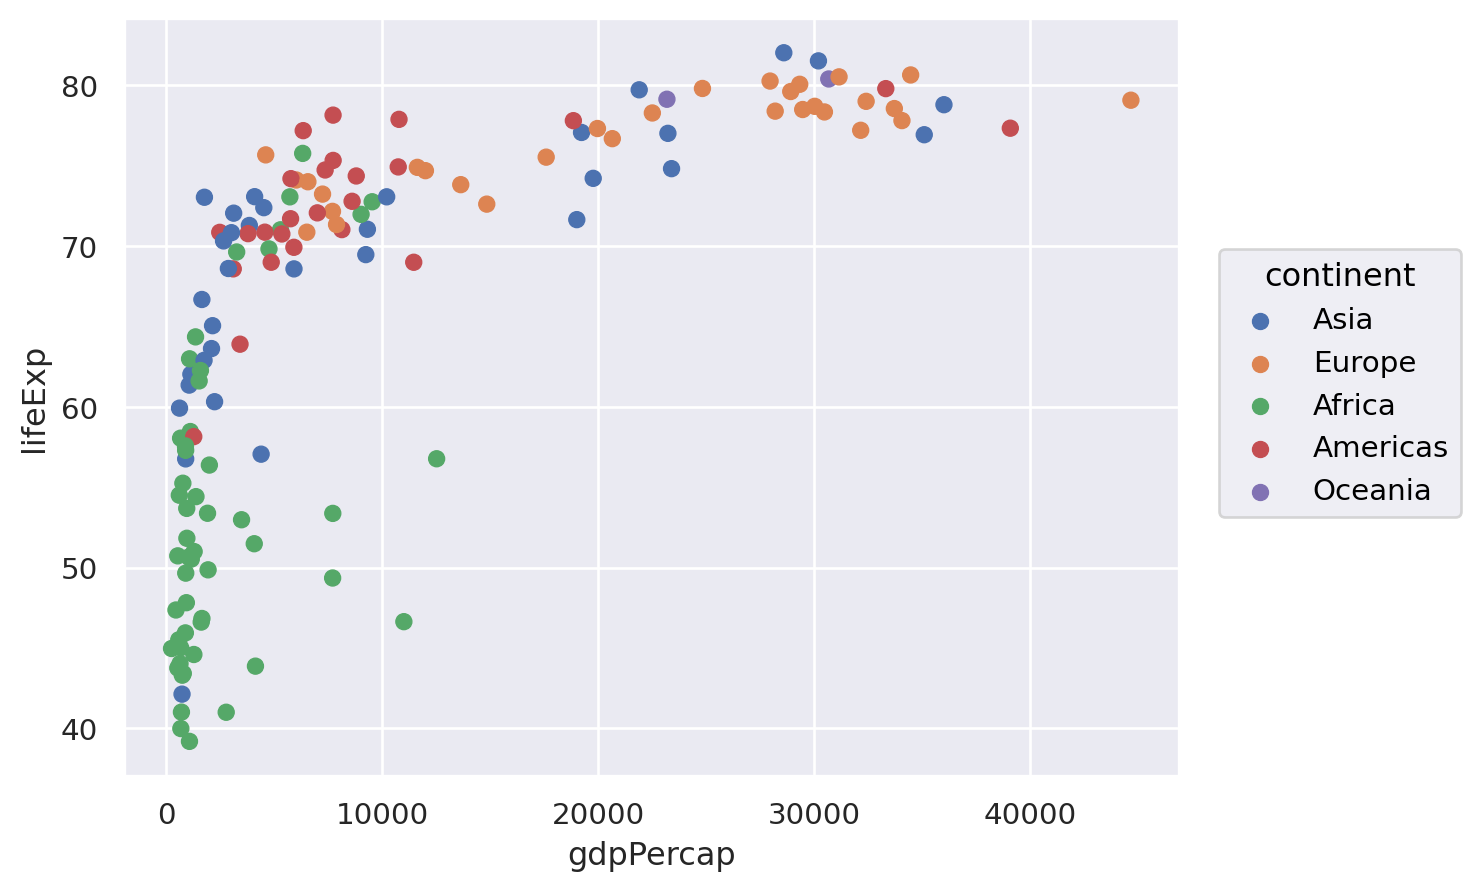

In [ ]:
(
  so.Plot(data= datos_2002, x="gdpPercap", y="lifeExp", color="continent")
  .add(so.Dot())
)

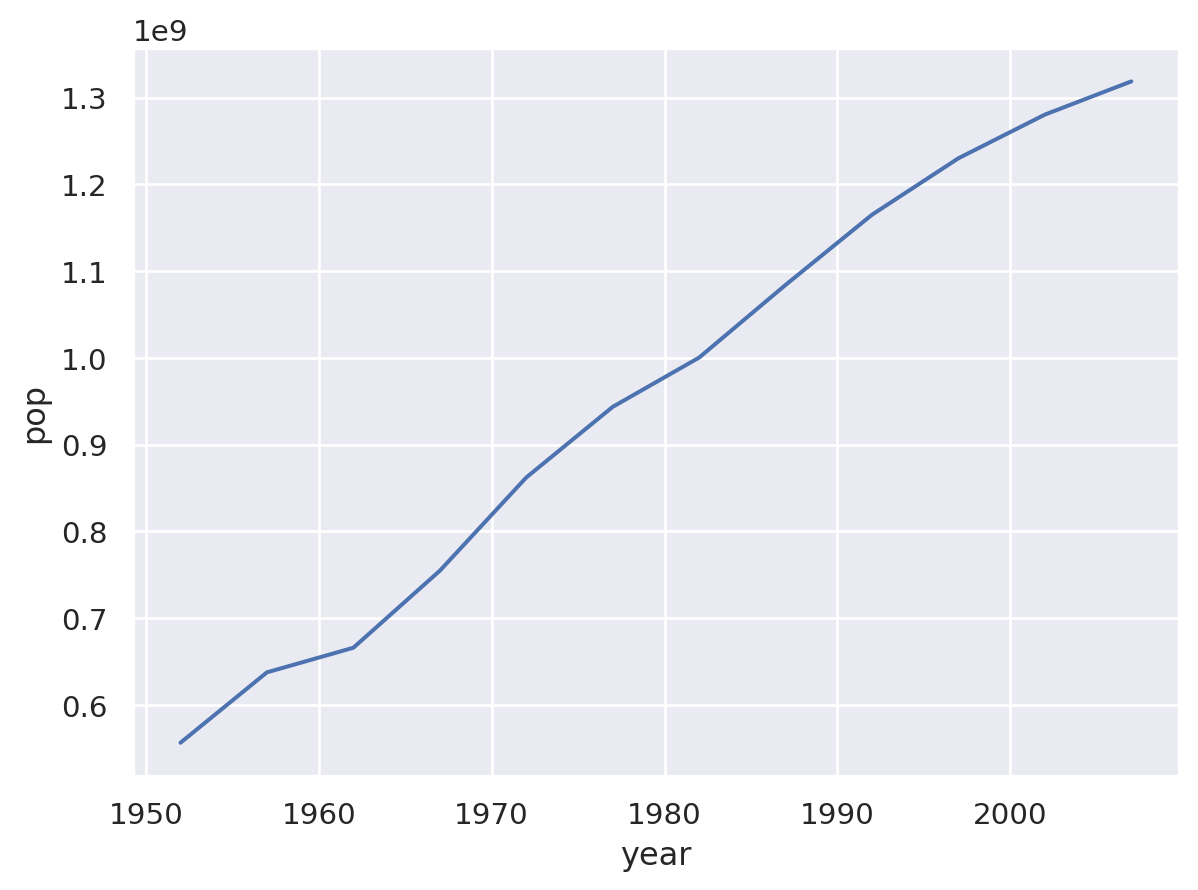

In [ ]:
(  so.Plot(data= datosChina, x="year", y="pop")
  .add( so.Line()))

# Ejercicio 1

En este ejercicio utilizamos los datos de gapminder (recordar el ejercicio 10 de la Práctica 2
para acceder a los datos de gapminder).


(a) Utilizando seaborn.objects, graficar la curva de la expectativa de vida en Argentina enfunción del año, completando el siguiente código. Sugerencia: recordar de la práctica anterior como filtrar datos de un dataset.

In [4]:
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


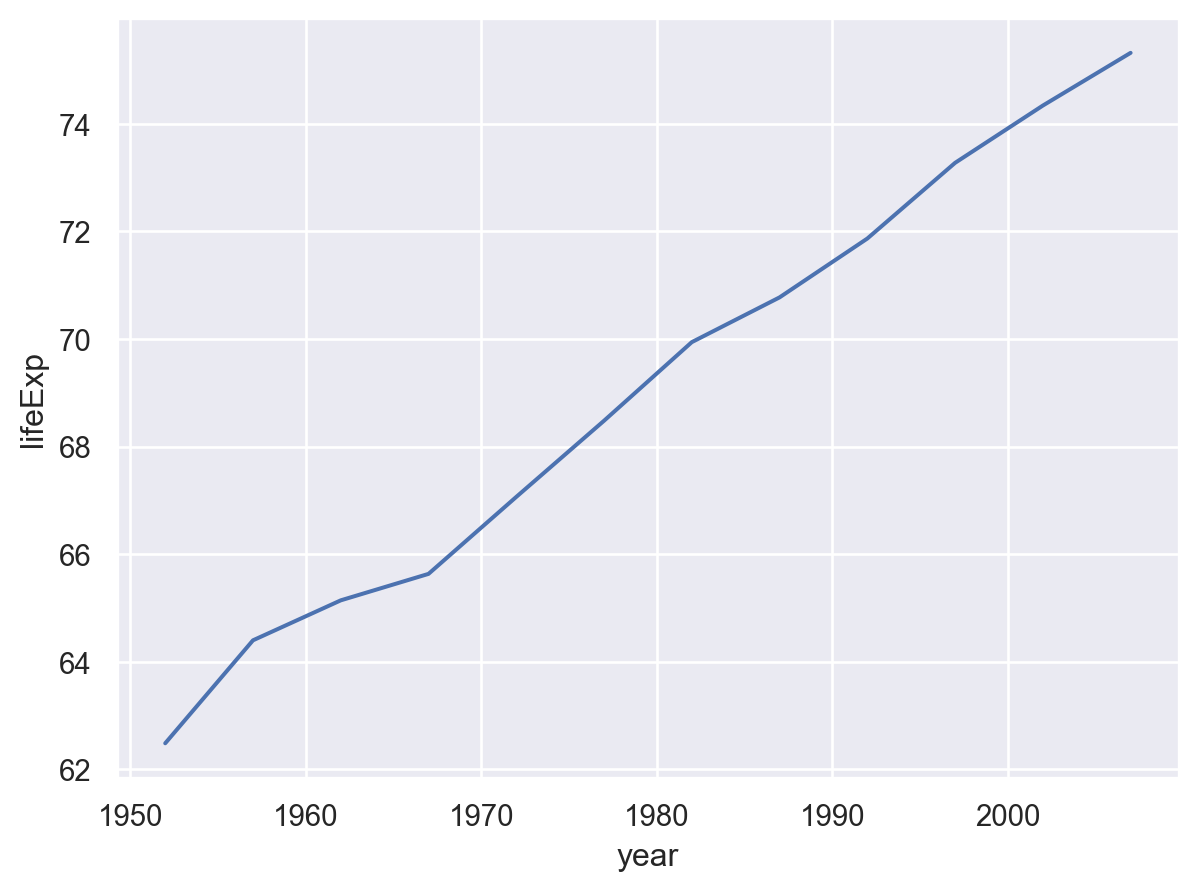

In [5]:
datosArgentina = gapminder[gapminder["country"]=="Argentina"]
#datosArgentina.head()
(
so.Plot( data = datosArgentina , x = "year", y = "lifeExp")
.add( so . Line () )
)

(b) Realizar un nuevo gráfico donde puedan verse las curvas de la expectativa de vida de los países de América en función del año, una curva por cada país.

Sugerencia: utilizar los parámetros group = ??? o color = ???. ¿Cuál es la diferencia entre los dos?


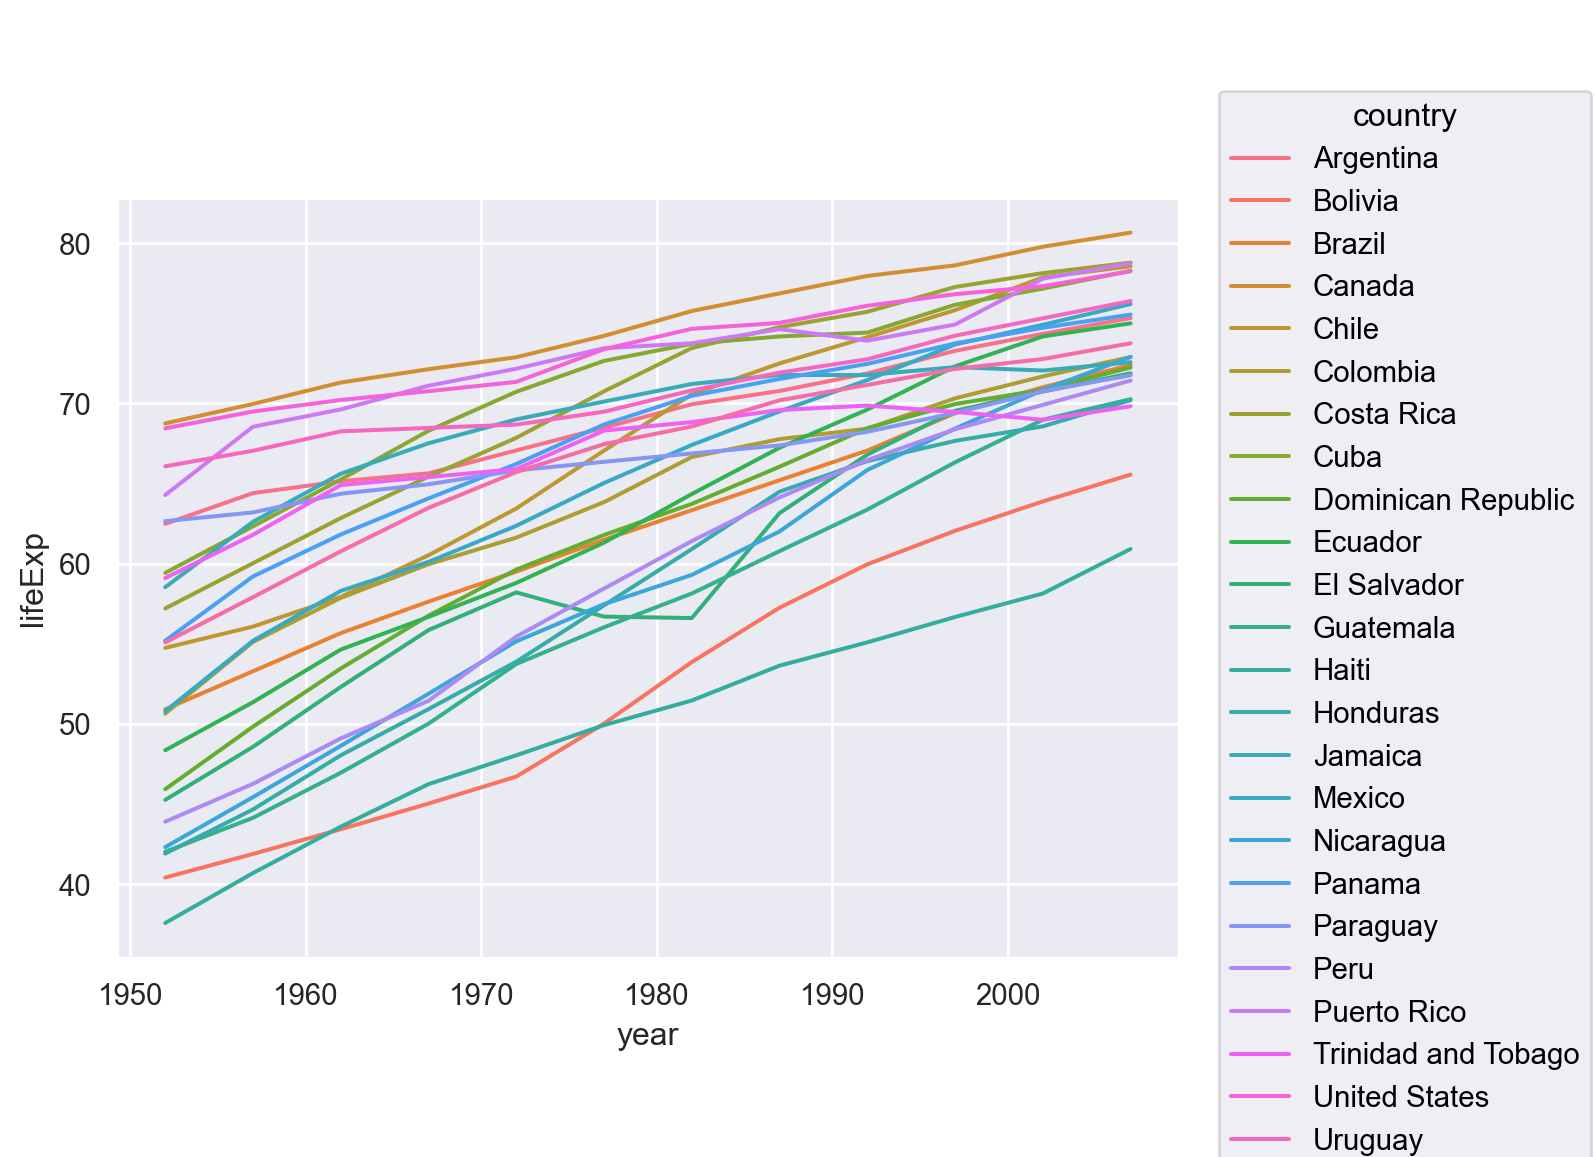

In [6]:
datosAmerica= gapminder[gapminder["continent"]=="Americas"]
#datosAmerica_= datosAmerica.groupby("country")
datosAmerica.head()

(
so.Plot( data = datosAmerica , x = "year", y = "lifeExp", color= "country")
.add( so . Line () )
)
#Como se hace con group??, no me toma datosAmerica_


dataframe.groupby() es una funcion de pandas
color y group son funciones de seaborn

(c) Queremos agregar al gráfico del ítem anterior una curva de tendencia lineal utilizando el método .add(so.Line(), so.PolyFit(1)). ¿Cuál de las siguientes dos formas de agrupar los datos es la forma correcta? Explicar la diferencia entre los dos códigos.

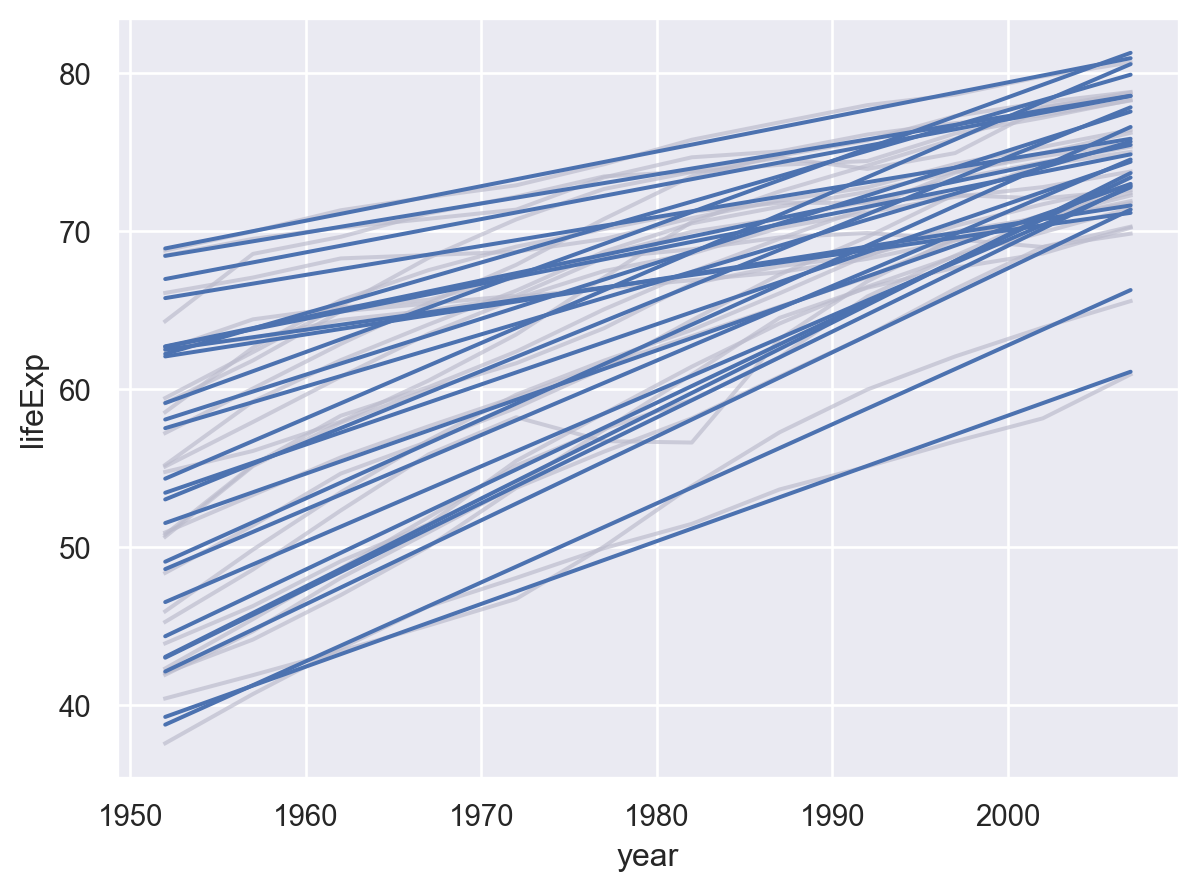

In [7]:
# Codigo 1
(
so.Plot ( data = datosAmerica , x ="year" , y ="lifeExp" , group = "country")
.add ( so.Lines( color = "#bbca" ) )
.add ( so.Line() , so.PolyFit(1) )
)

Aca hace el gráfico por país de lifeExp en funcion del año, luego colorea esea grafico de gris y la linea de tendencia se hace sobre cada pais

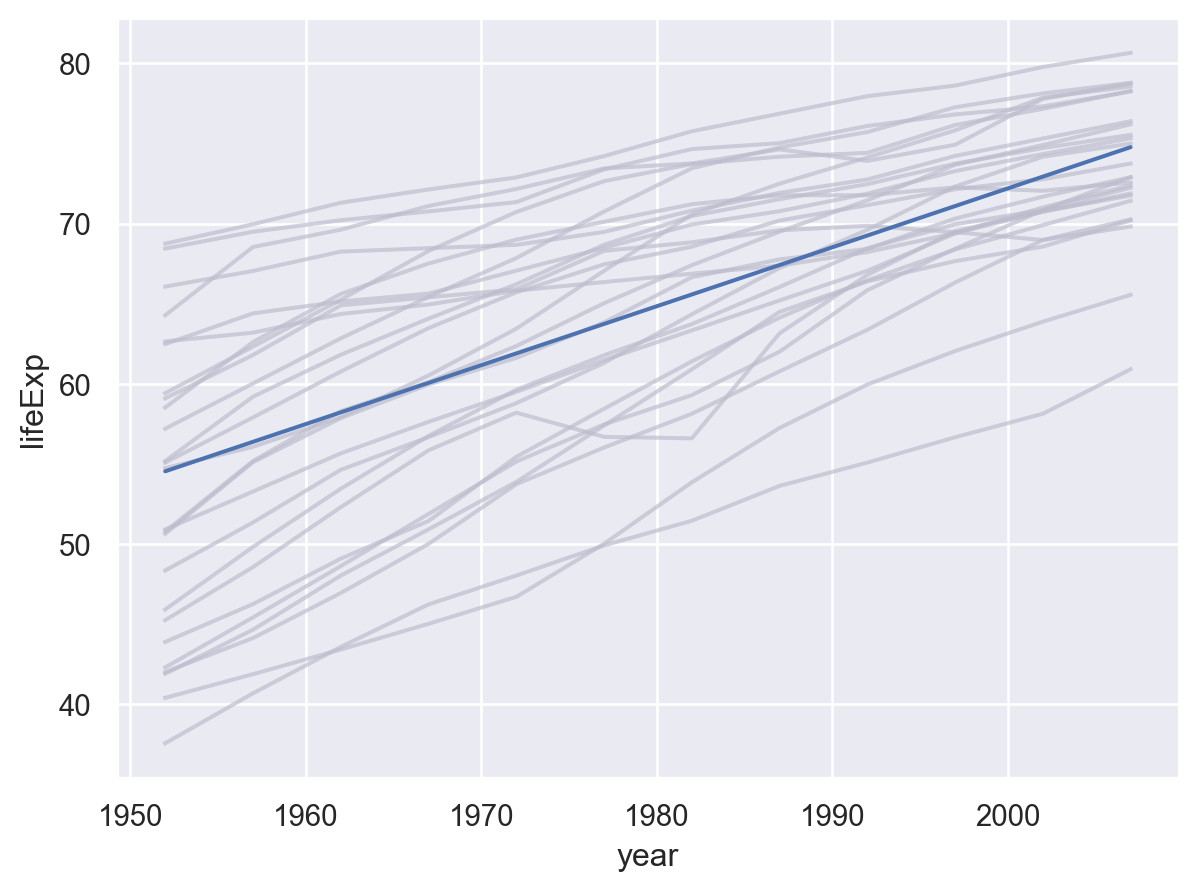

In [8]:
# Codigo 2
(
so.Plot( data = datosAmerica , x ="year" , y ="lifeExp")
.add( so.Lines( color = "#bbca" ) , group = "country")
.add( so.Line() , so.PolyFit (1) )
)

Acá se hace el grafico, se colorea todo de gris y si agrupa por pais DESPUES entonces se hace una unica linea de polyfit que refleja la tendencia de todos los países. Esta es la opción correcta

(d) Realizar el siguiente gráfico, con las curvas de expectativa de vida agrupadas por continente. Sugerencias: ¿qé hace el método facet() de seaborn.objects.Plot()? ¿Y el parámetro wrap = ??? de facet()?

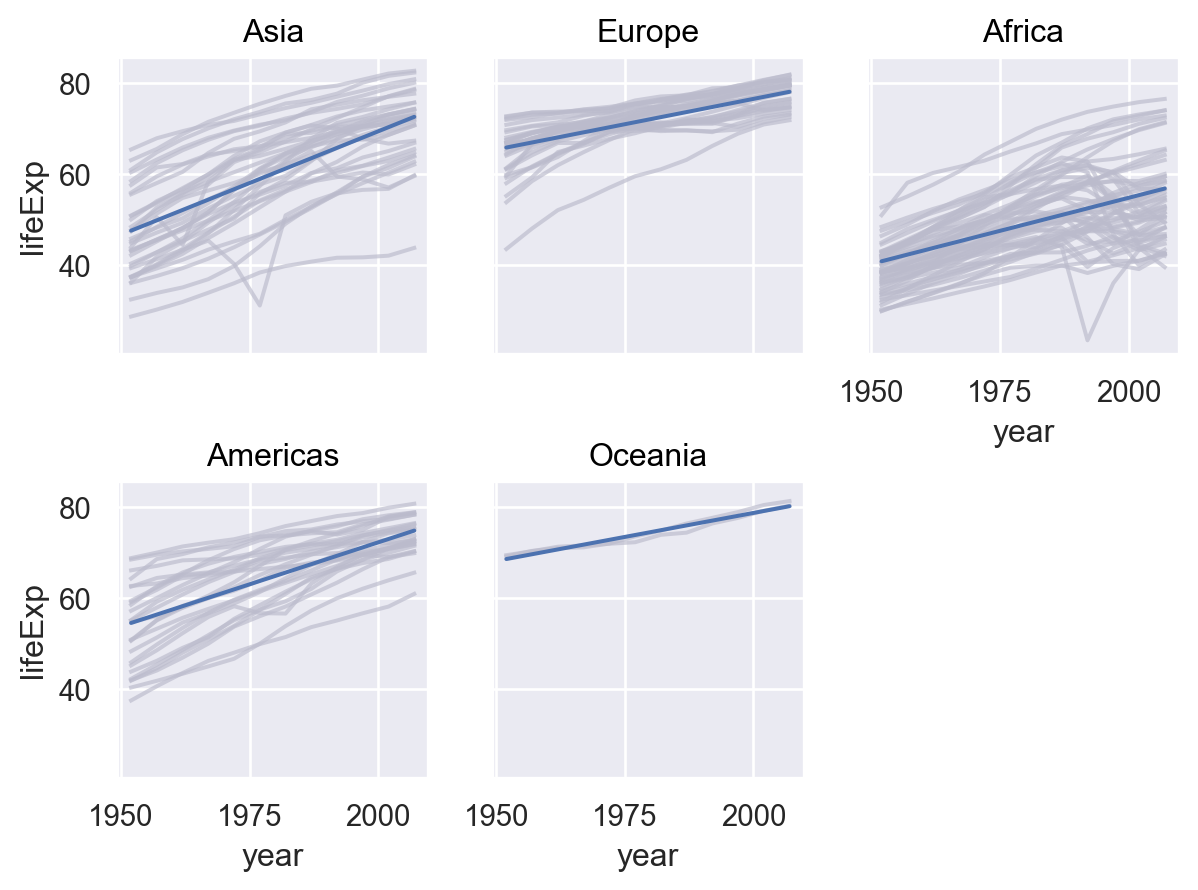

In [9]:
grafico= (
    so.Plot(data= gapminder, x="year", y="lifeExp", group= "continent")
    .add( so.Lines(color="#bbca"), group="country")
    .add( so.Line(), so.PolyFit(1) )
)

grafico.facet("continent", wrap=3)

Facet lo que hace es separarte los graficos y wrap te dice de a cuantos queres las filas

Notemos que en el plot primero agrupamos por continente y despues por pais (en ese orden)

# Ejercicio 2

2. En los siguientes ejercicios vamos a trabajar con el dataset penguins disponible en la biblioteca seaborn. ¿Cuántas filas y columnas hay en el dataset penguins?

In [10]:
penguins = sns.load_dataset ("penguins")
penguins.head()
penguins.shape
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


.shape te da (#filas, #columnas)
.info() te dice en entrys la cantidad de filas y en comns te dice cuantas hay

# Ejercicio 3

Como vimos en el Ejercicio 1c, si asignamos una codificación (o mapeo) al definir un Plot(), el mapeo se asigna en todas las capas de marcas (objetos mark). En cambio, si asignamos una codificación dentro del método add() de una marca, mapeo se realiza solo en esa capa. Por último, si asignamos un parámetro de la marca, el valor se asigna directamente (ver gráfico).

¿Qué resultado esperan para el siguiente gráfico?

¿Cuáles codificaciones se pasan de Plot()a Dot() y cuáles no pueden pasarse?

¿Cuáles codificaciones se establecen en Dot()?

¿Cuáles variables están asignadas directamente en Dot()?

¿De qué color van a pintarse los puntos?

Es un gráfica de alto por ancho de los pingüinos, colorea por especies
Los puntos se colorean de .8

Marker cambia las formas de los puntos
Edgewidth tiene que ver con el borde de los puntos y agrega las etiquetas del costado
Edcolor cambie el color del borde segun el sexo

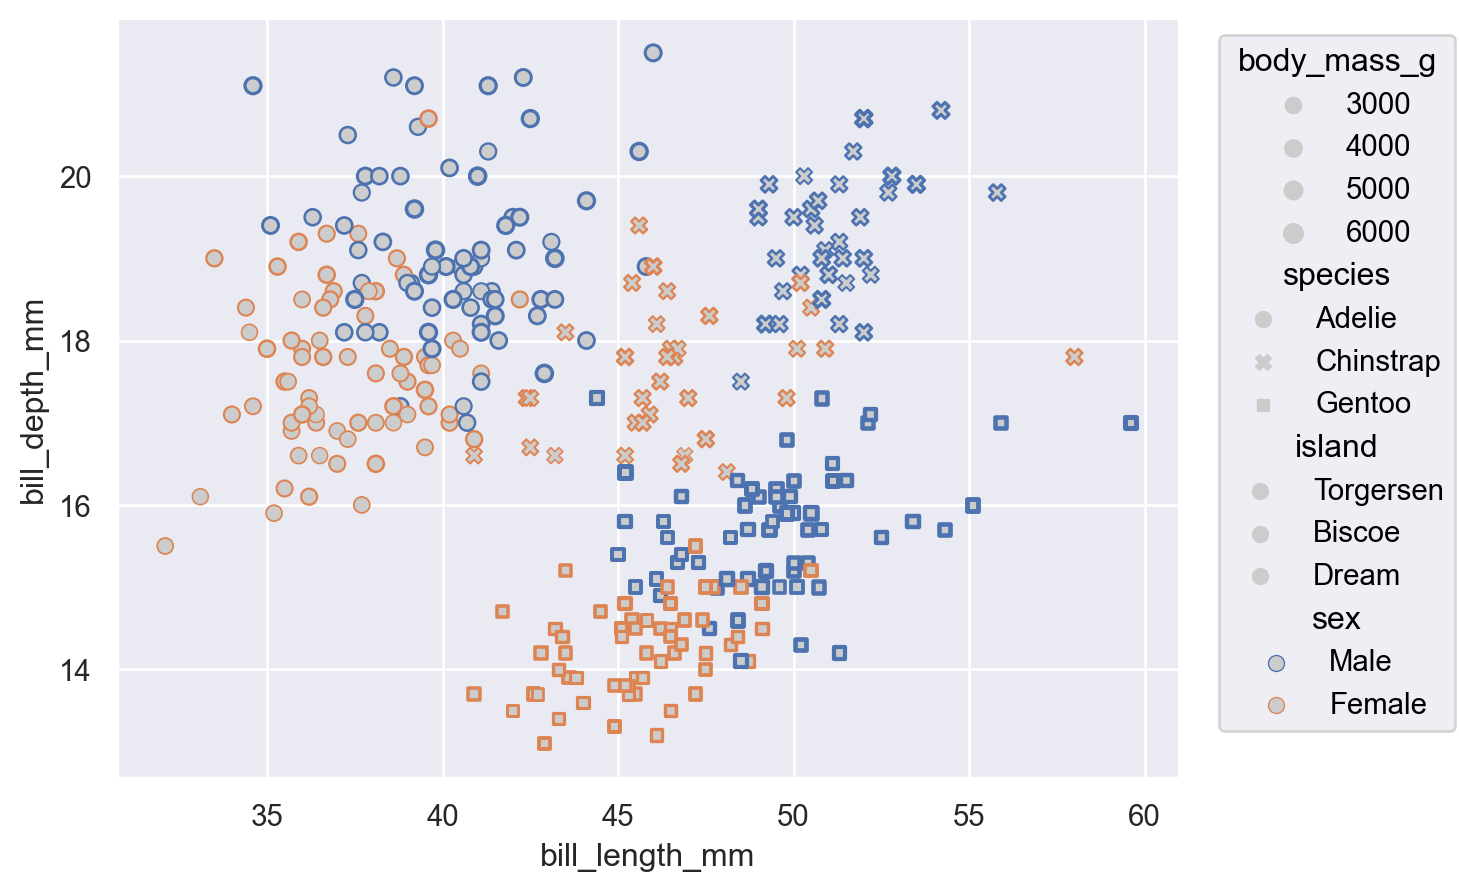

In [11]:
(
  so.Plot( penguins, x = "bill_length_mm", y = "bill_depth_mm", edgewidth = "body_mass_g" , marker = "species" , linestyle = "island" , color = "species")
  .add ( so.Dot(color = ".8 ") , edgecolor = "sex" )
)

# Ejercicio 4

(a) Hacer un gráfico de dispersión de bill_depth_mm (en el eje x) vs. bill_length_mm (en el eje y).

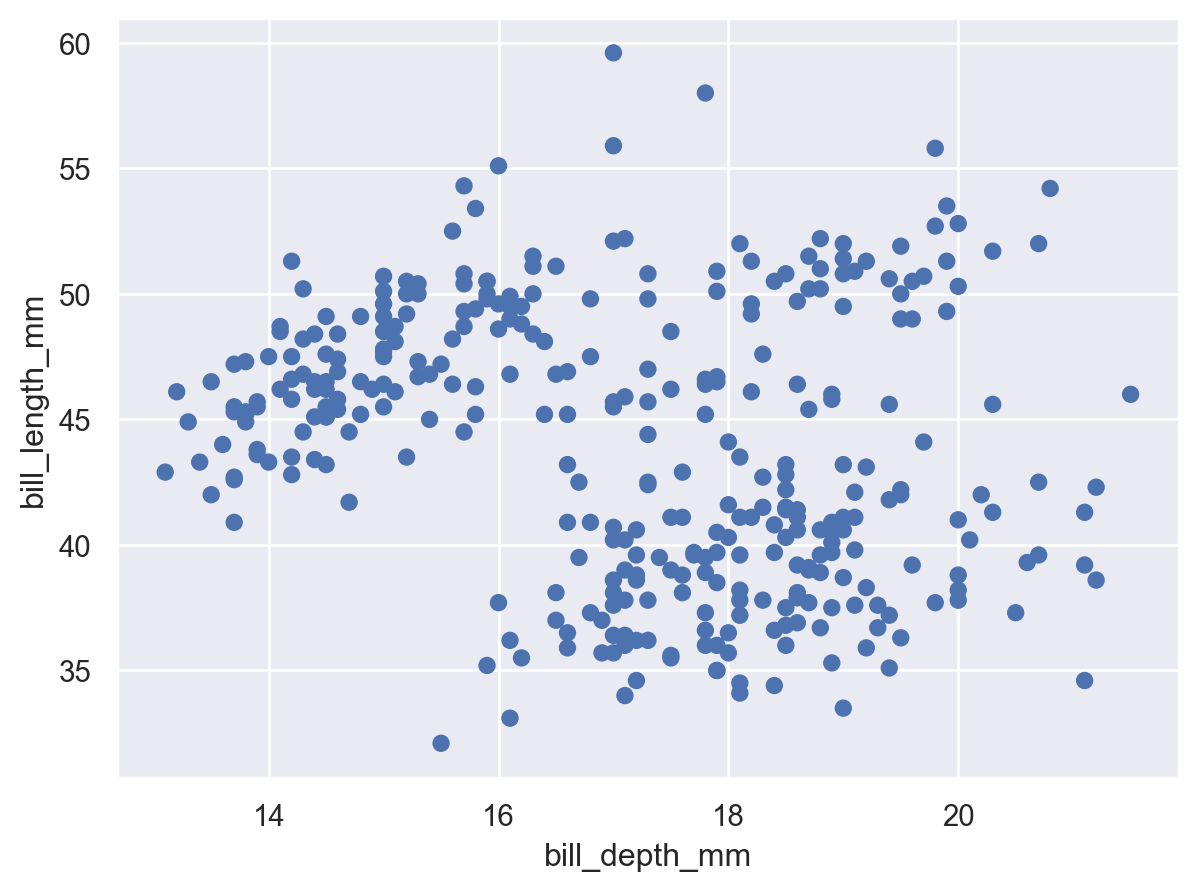

In [12]:
(
    so.Plot(penguins, x="bill_depth_mm", y="bill_length_mm")
    .add(so.Dot())
)

(b) ¿Distinguen grupos distintos de puntos en el gráfico? ¿A qué puede deberse?

Vimos en el ejercico 3 que los grupos se ven distinguidos por la especie que esta relacionado tambien con la masa

(c) Introducir alguna modificación en el gráfico anterior para verificar o refutar su conjetura
del ítem anterior.

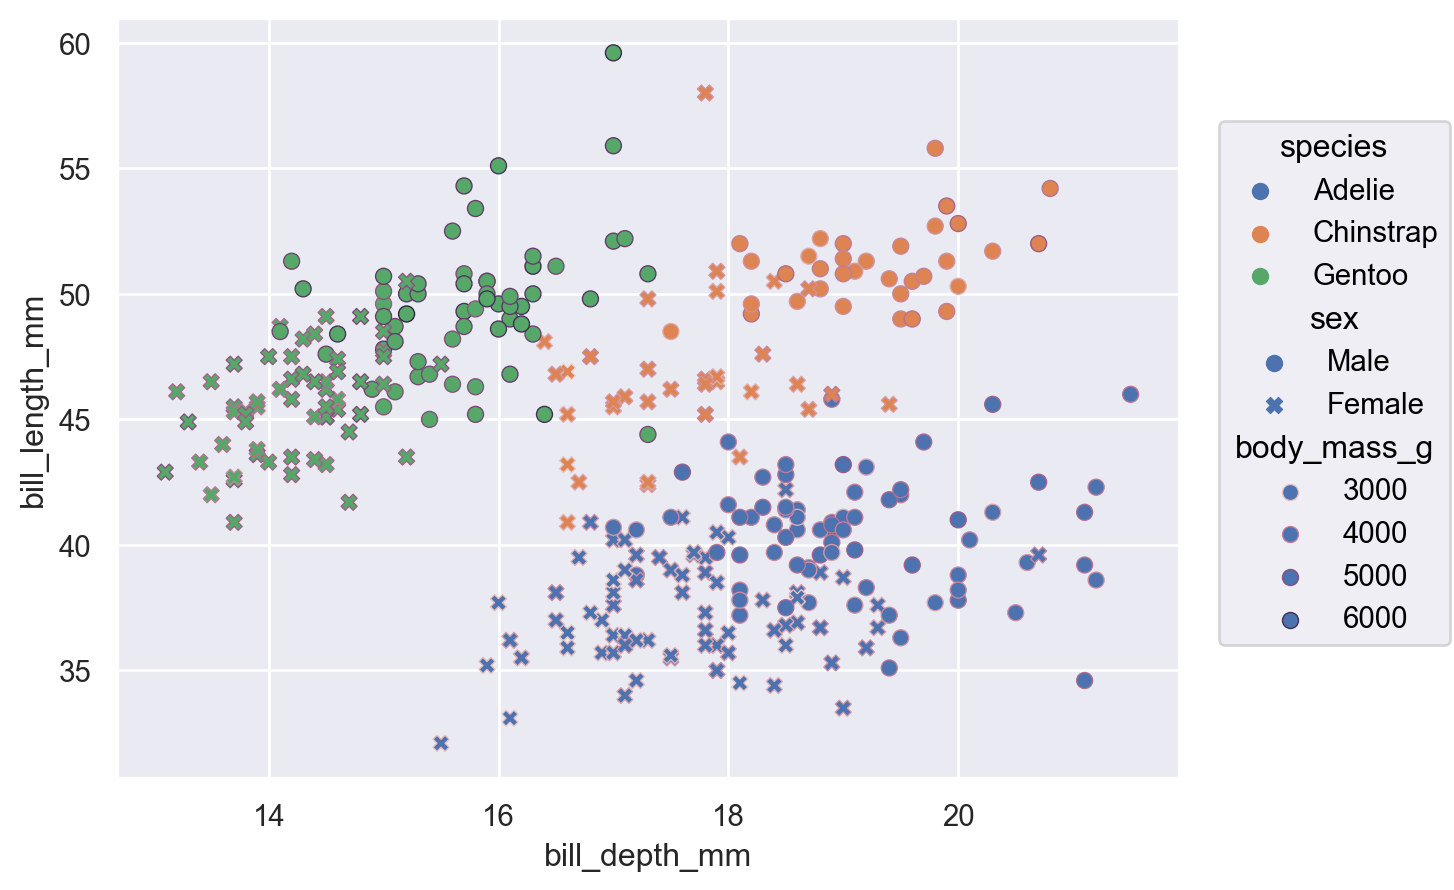

In [13]:
(
    so.Plot(penguins, x="bill_depth_mm", y="bill_length_mm", color="species", marker="sex", edgecolor="body_mass_g")
    .add(so.Dot(), )
)

# Ejercicio 5

5. (a) Rehacer el gráfico del ejercicio 4, coloreando los puntos según el sexo. ¿Qué se observa?

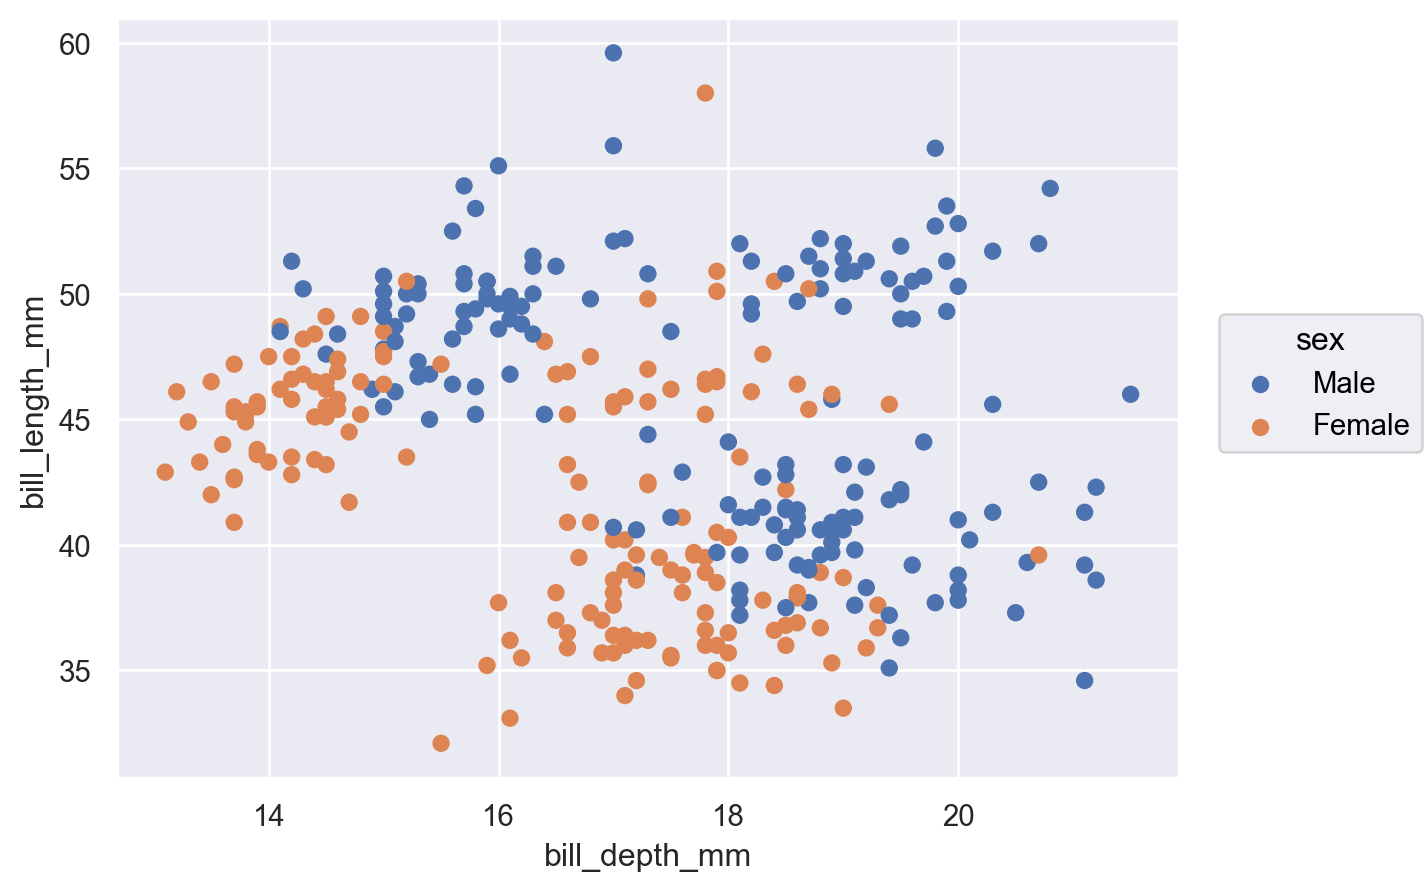

In [14]:
(
    so.Plot(penguins, x="bill_depth_mm", y="bill_length_mm",color="sex")
    .add(so.Dot())
)

Vemos que aparentemente cada grupo esta subdividido en dos grupos

(b) Usando la función facet() separar el gráfico del item anterior en tres subgráficos, uno para cada especie.

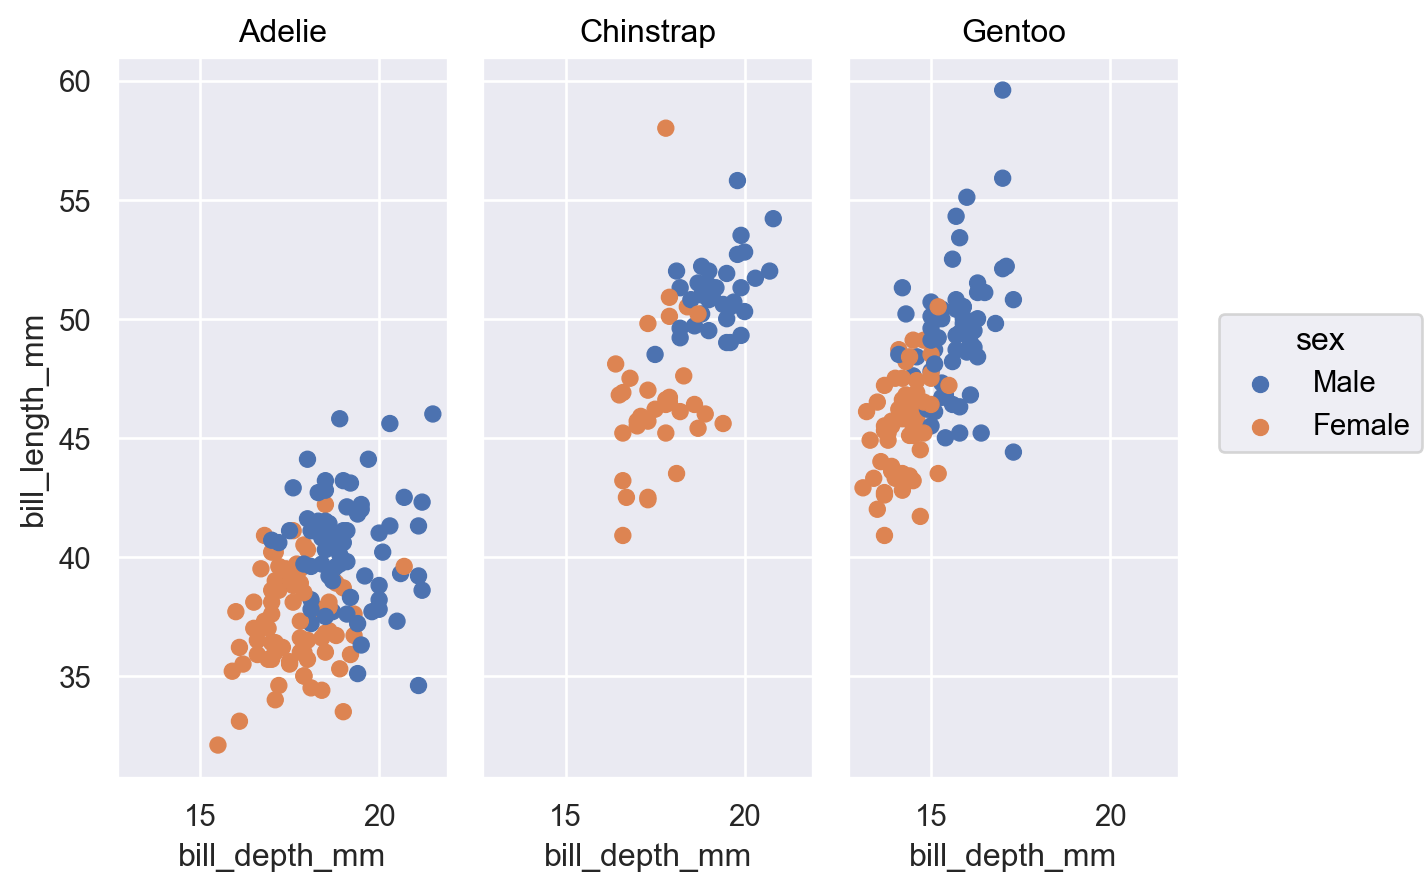

In [15]:
grafico=(
    so.Plot(penguins, x="bill_depth_mm", y="bill_length_mm",color="sex")
    .add(so.Dot())
)
grafico.facet("species")

# Ejercicio 6

6. (a) ¿Cuántos pingüinos hay en cada isla en la base de datos? Recordar los comandos groupby() y size() de la práctica anterior.

In [16]:
peng_Is= penguins.groupby("island")
peng_Is.size()

island
Biscoe       168
Dream        124
Torgersen     52
dtype: int64

(b) Realizar un grafico de barras con la cantidad de pingüinos en cada isla, completando el siguiente código.

In [17]:
pinguinos_por_isla = penguins.groupby("island") # Usar el codigo del item anterior
pinguinos_por_isla.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
20,Adelie,Biscoe,37.8,18.3,174.0,3400.0,Female
21,Adelie,Biscoe,37.7,18.7,180.0,3600.0,Male
22,Adelie,Biscoe,35.9,19.2,189.0,3800.0,Female
23,Adelie,Biscoe,38.2,18.1,185.0,3950.0,Male
24,Adelie,Biscoe,38.8,17.2,180.0,3800.0,Male


In [18]:
pinguinos_por_isla.island

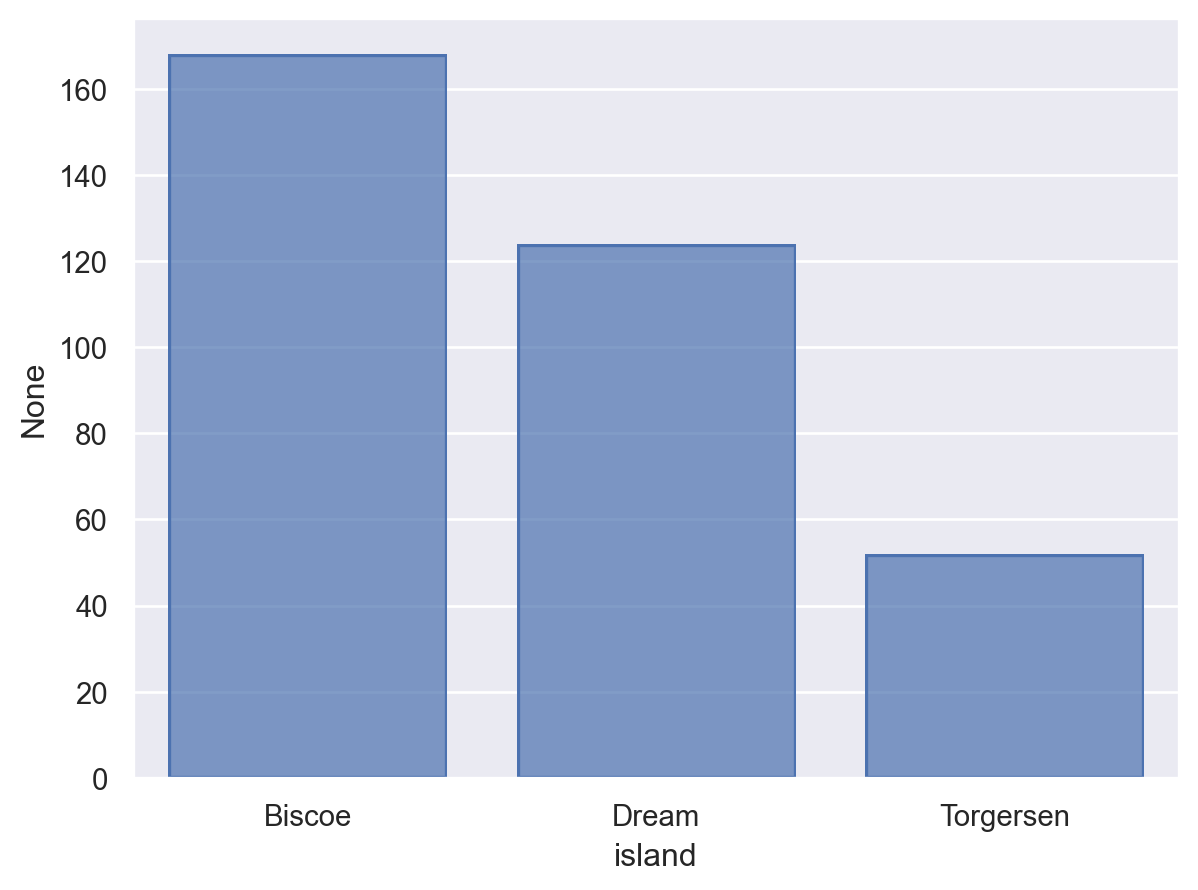

In [19]:
(
so.Plot( x = pinguinos_por_isla.size().index, y=pinguinos_por_isla.size()) #si pones en la deficion de pinguinos_por_isla el .size() ahi si te da poniendo directamente el ii
.add( so.Bar() )
)

(c) El gráfico que acabamos de hacer es un histograma categórico (usamos una variable categórica en el eje X). Podemos realizar el mismo gráfico usando la función Hist() para contar automáticamente las cantidades (sin definir una variable pinguinos_por_isla). Completar el siguiente código.

(d) ¿Por qué no especificamos ninguna variable y en el último gráfico?

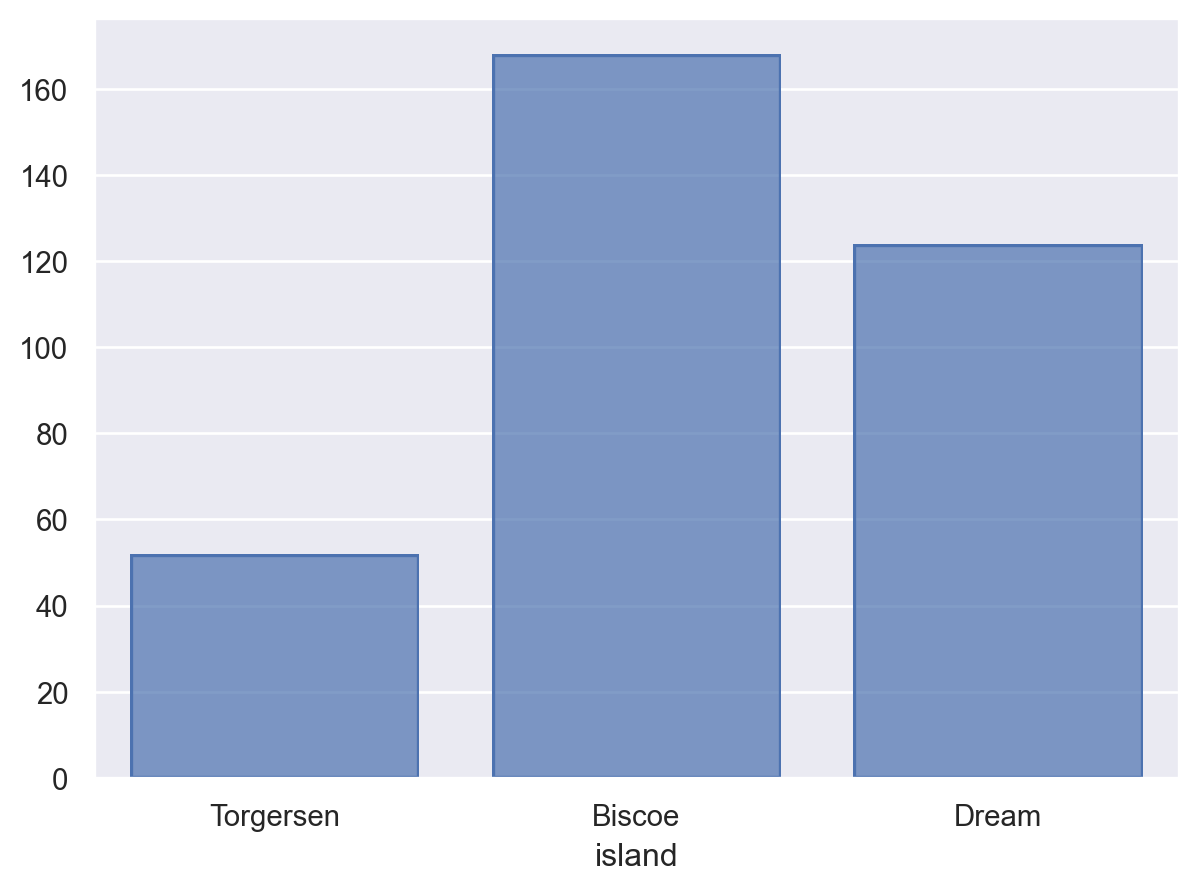

In [20]:
(
so.Plot( data = penguins , x= "island") #por que me da sin definir y
.add( so.Bar() , so.Hist() )
)

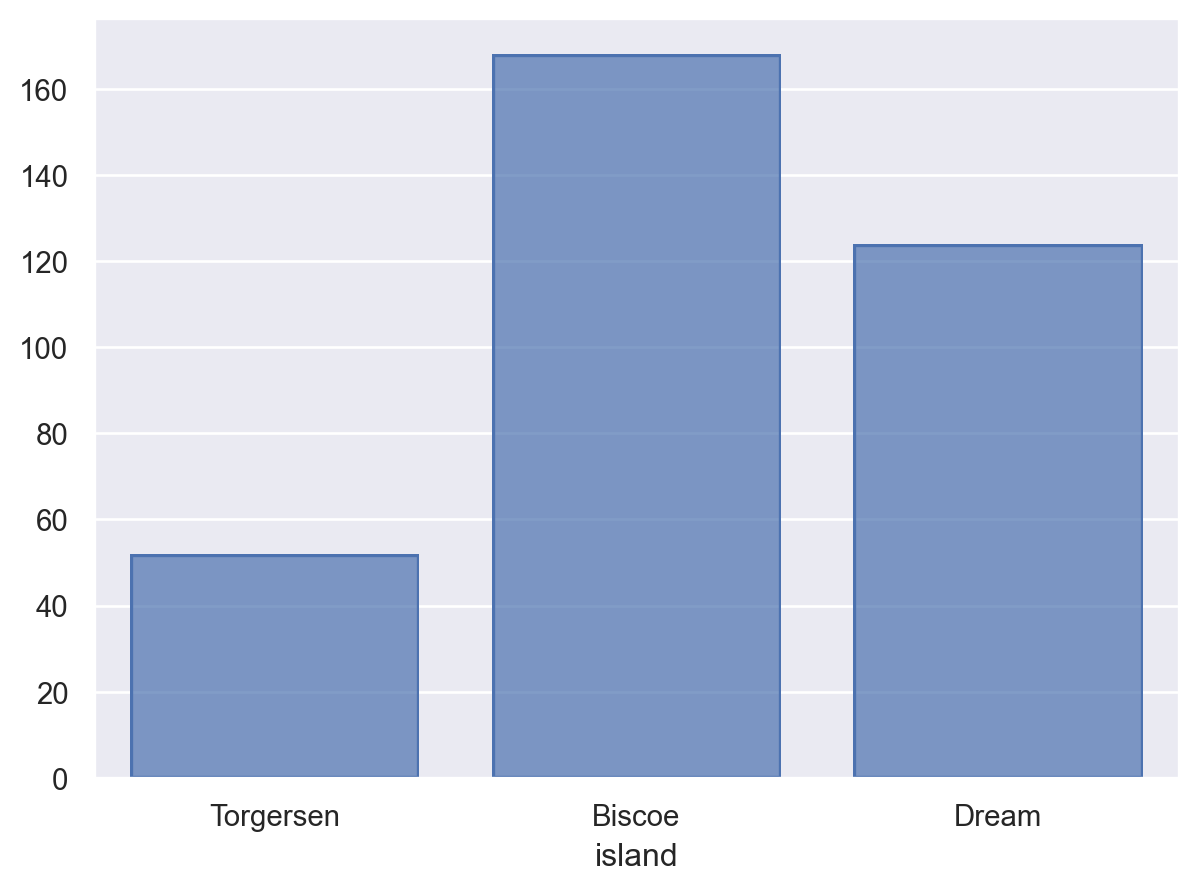

In [21]:
(
so.Plot( data = penguins , x= "island", y=1) #por que me da sin definir y
.add( so.Bar() , so.Agg("sum") )
)

Imagino que cuenta por defecto la cantidad de apariciones (no chequeado)

(e) Queremos ver en un gráfico cuántos pingüinos de cada especie hay en cada isla, ¿cómo podemos hacerlo? Si usan un gráfico de barras, pueden utilizar la función dodge() para hacer varias barras por categoría.

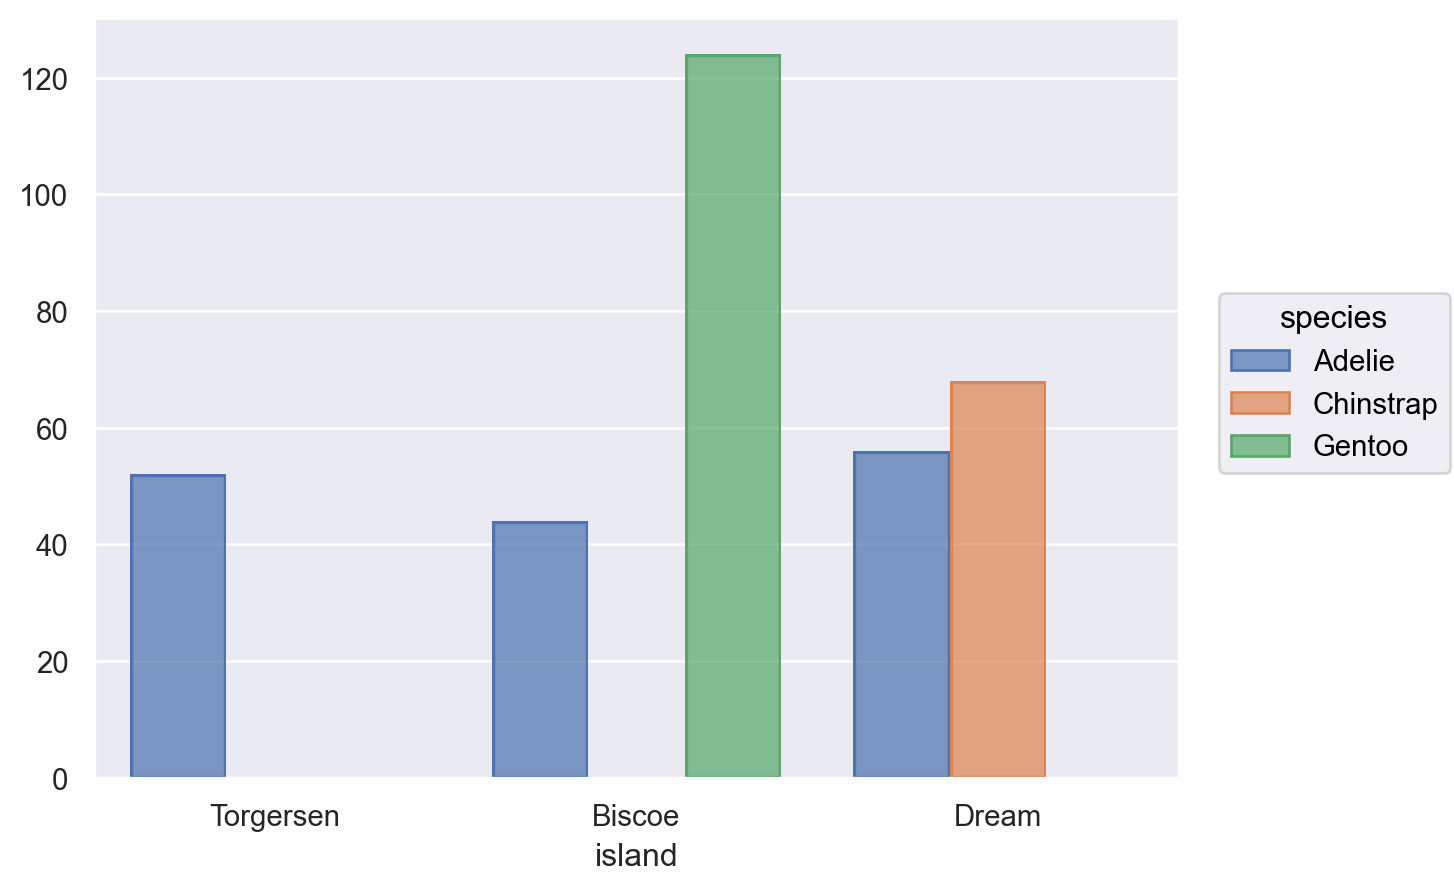

In [22]:
(
so.Plot( data = penguins , x= "island", color="species") #por que me da sin definir y
.add( so.Bar() , so.Hist (), so.Dodge("island") )
)

(f) ¿Cómo podrían visualizar lo mismo usando facet()?

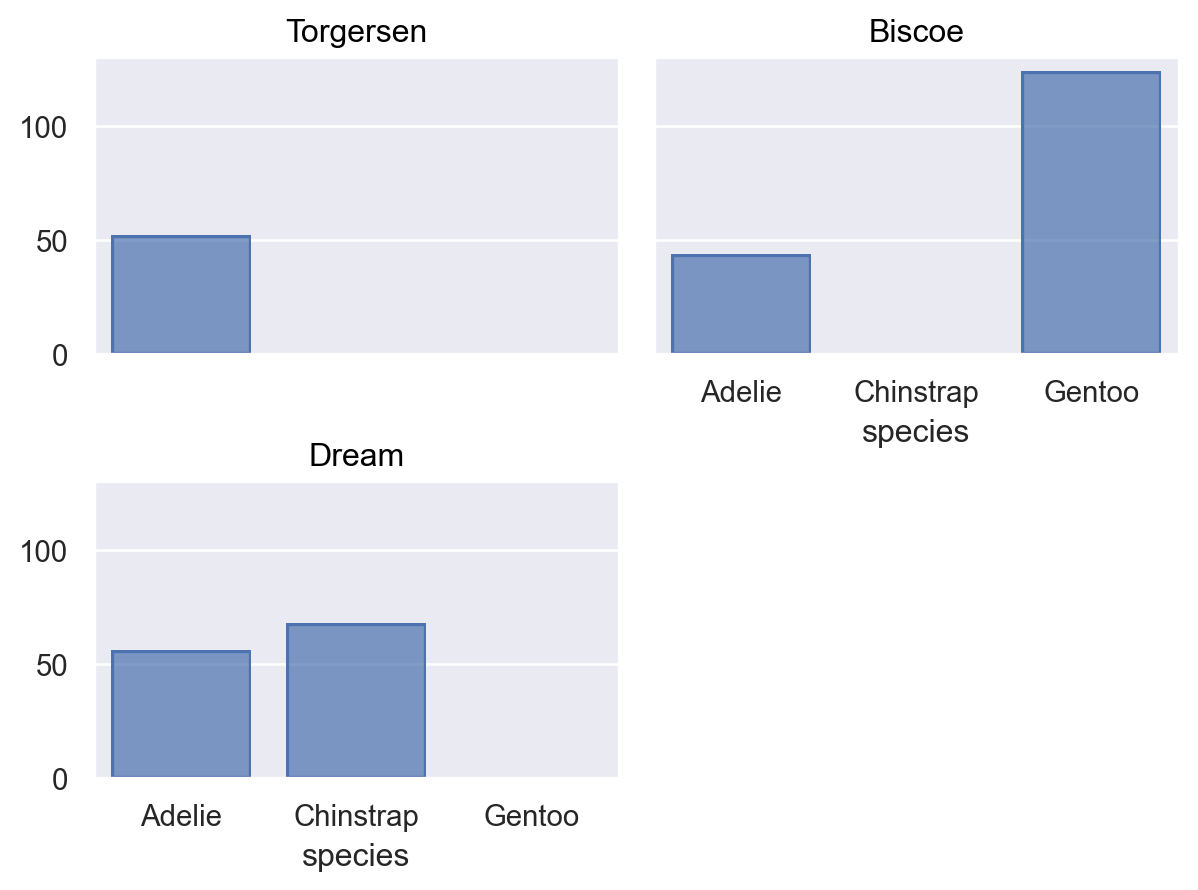

In [23]:
(
so.Plot( data = penguins , x= "species") #por que me da sin definir y
.add( so.Bar(),so.Hist())
.facet("island", wrap=2)
)


# Ejercicio 7

Realizar un histograma de la cantidad de pingüinos en función del tamaño del ala (variable flipper_length_mm). A partir del gráfico, estimar el valor mínimo, máximo, la media y la mediana. Verificar sus estimaciones utilizando los comandos apropiados

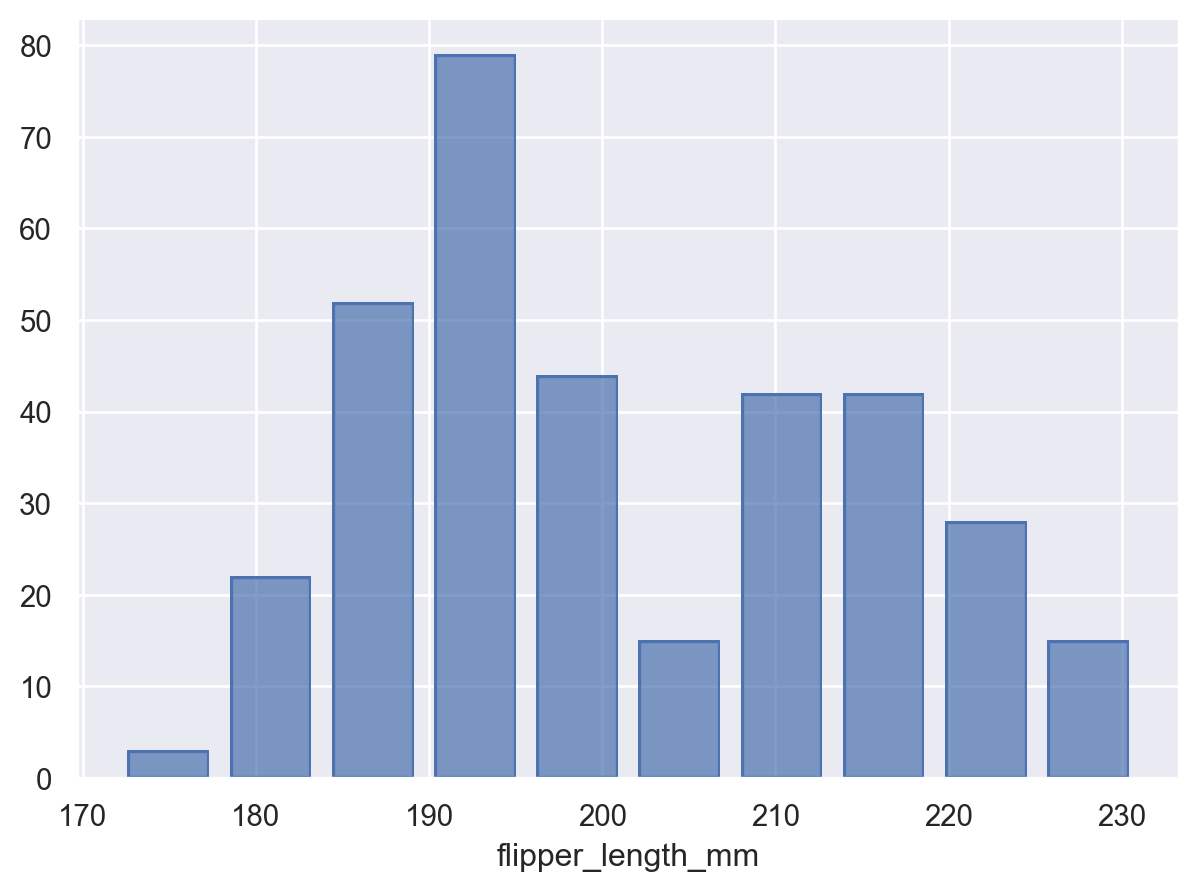

In [24]:
(
so.Plot( data = penguins , x= "flipper_length_mm")
.add( so.Bar() , so.Hist() )
)

El min esta entre 170 y 180 y el max entre 190 y 200

In [25]:
penguins["flipper_length_mm"].median()

197.0

In [26]:
penguins["flipper_length_mm"].max()

231.0

In [27]:
penguins["flipper_length_mm"].min()

172.0

In [28]:
penguins["flipper_length_mm"].mean()

200.91520467836258

In [29]:
penguins["flipper_length_mm"].std()

14.061713679356888

# Ejercicio 8

a) Calcular distintos estadísticos de la variable bill_depth_mm (mínimo, máximo, media, ...).

In [30]:
print(penguins['bill_depth_mm'].min())
print(penguins['bill_depth_mm'].max())
print(penguins['bill_depth_mm'].mean())
print(penguins['bill_depth_mm'].median())


13.1
21.5
17.151169590643278
17.3


b) Según lo observado en el ejercicio 4, ¿esos valores varían según la especie? ¿Cómo podemos
usar gráficos BoxPlot para para ver la relación entre species y bill_depth_mm?

Sí, los valores varían según la especie

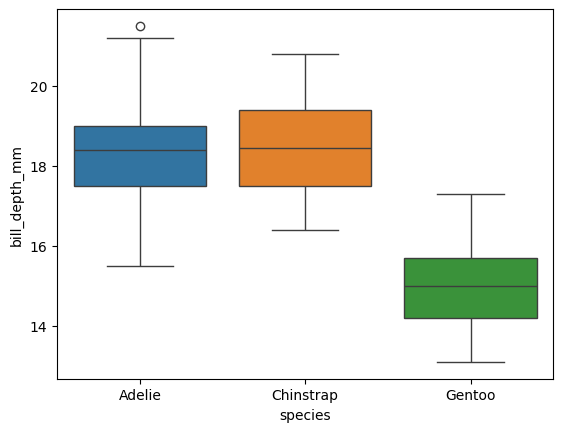

In [31]:
sns.boxplot(data = penguins, x="species", y = "bill_depth_mm", hue = "species")
plt.show()

# Ejercicio 9

a) Rehacer el scatter plot del ejercicio 4, modificando el tamaño de los puntos según el peso de cada pingüino, utilizando el parámetro pointsize="???". ¿Qué se observa?

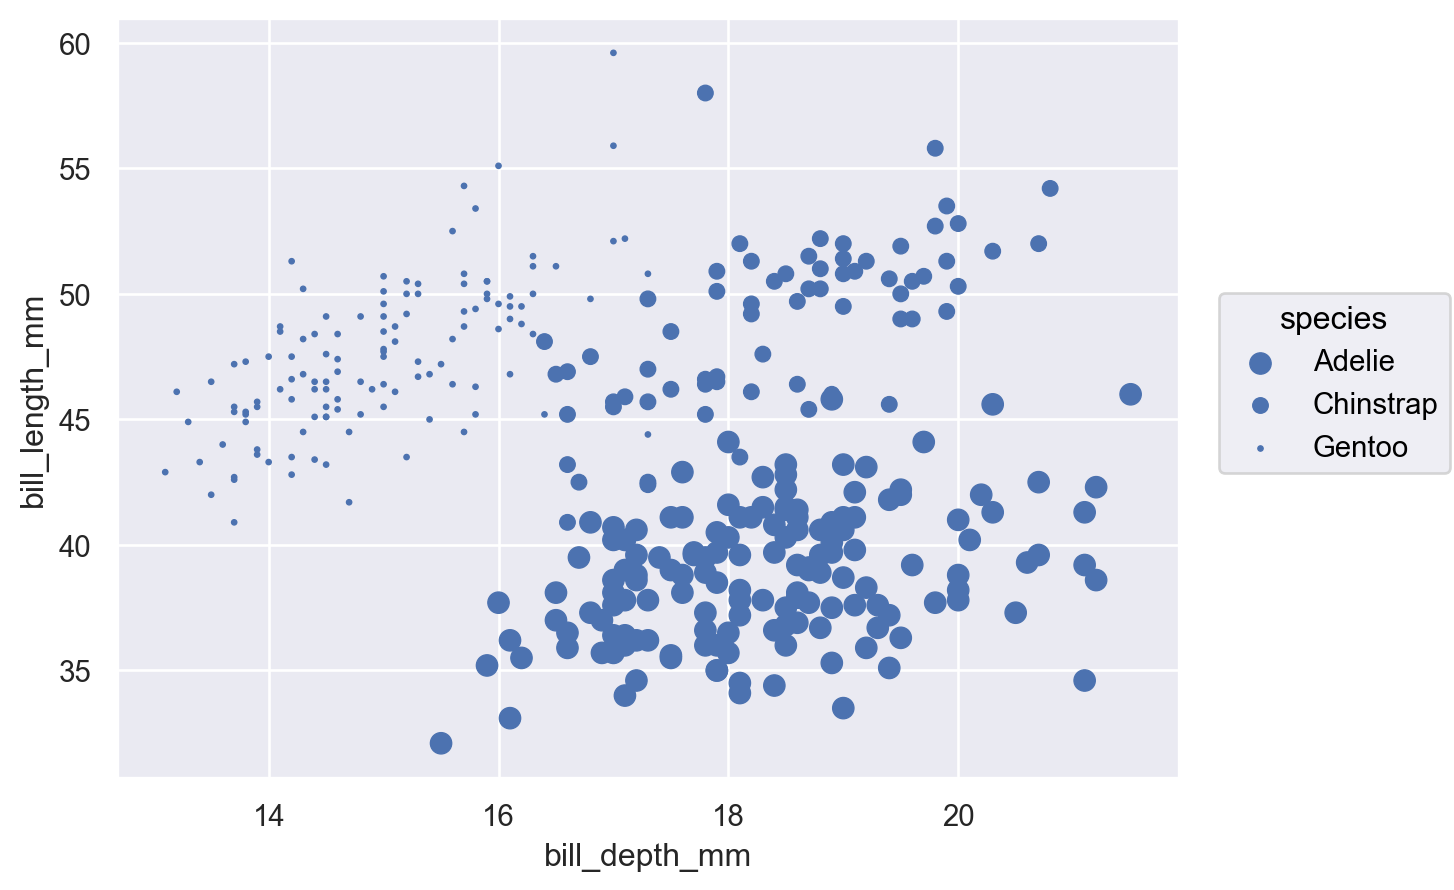

In [32]:
(
    so.Plot(penguins, x="bill_depth_mm", y="bill_length_mm")
    .add(so.Dot(), pointsize="species")
)

Cambia el tamaño del punto segun, en este caso, la especie

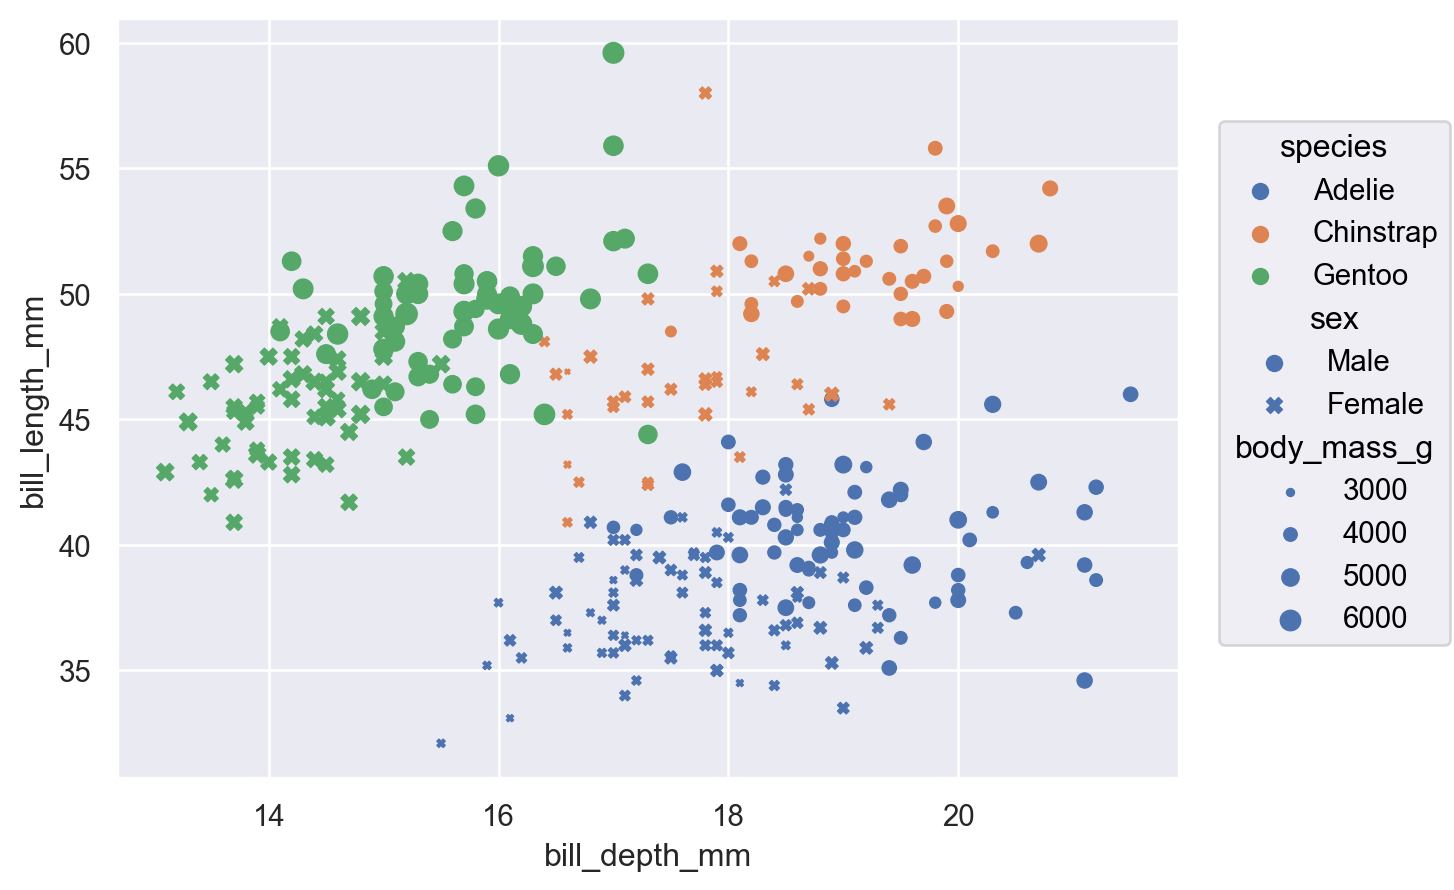

In [33]:
(
    so.Plot(penguins, x="bill_depth_mm", y="bill_length_mm", color="species", marker="sex")
    .add(so.Dot(), pointsize="body_mass_g" )
)

b) En base a lo observado, ¿cuál es la especie con mayor peso? Verificarlo mediante alguna visualización

La especie de mayor peso parecería ser la Gentoo

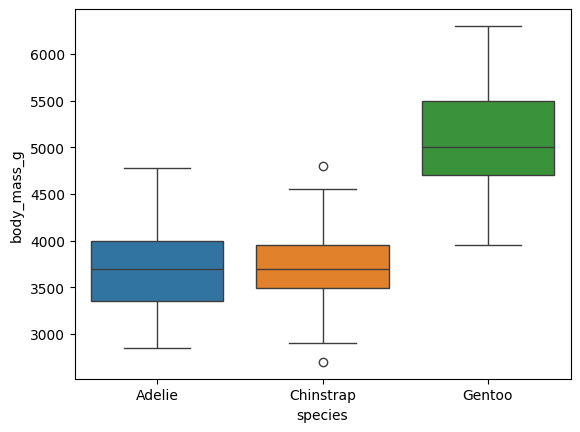

In [34]:
sns.boxplot(data = penguins, x="species", y = "body_mass_g", hue = "species")
plt.show()

# Ejercicio 10

Tenés datos de una encuesta realizada en distintas provincias de Argentina y querés saber cuántas personas respondieron a la encuesta en cada provincia. ¿Hacés un gráfico de líneas, de
dispersión (scatter), histograma o un gráfico de barras (bar plot)? Hacé a mano en tu cuaderno cómo esperás que se vea el gráfico.

Me convendría utilizar un bar plot porque las provincias son variables categóricas. Se verian las distintas provs representada c/u por una barra y su altura representa la cant de personas que respondieron

# Ejercicio 11

Estás estudiando la relación entre altura y peso de las personas. Tenés un data-set que tiene como variables la edad, sexo y peso de cada persona. Si querés describir estas variables por
separado, ¿qué gráfico harías para cada una? ¿y si querés visualizar la relación entre peso y altura? Hacé a mano en tu cuaderno cómo esperás que se vea el gráfico.

Para ver la relación entre peso y altura quizá me convenga un gráfico de líneas dado que las dos variables son numéricas (o quizá ordinales, no me acuerdo el nombre). Esperaría ver una recta lineal o al menos algo que se podría ajustar bien con una lineal.

# Ejercicio 12

Hacé un gráfico de barras que muestre la cantidad de países hay en cada continente según los datos de gapminder.

(a) ¿Cómo podemos hacerlo calculando primero las cantidades y llamando a .add(so.Bar())?

(b) ¿Cómo podemos hacerlo utilizando so.Hist() para calcular las cantidades?

In [35]:
s = gapminder.groupby("continent").country.nunique()
df = s.reset_index()


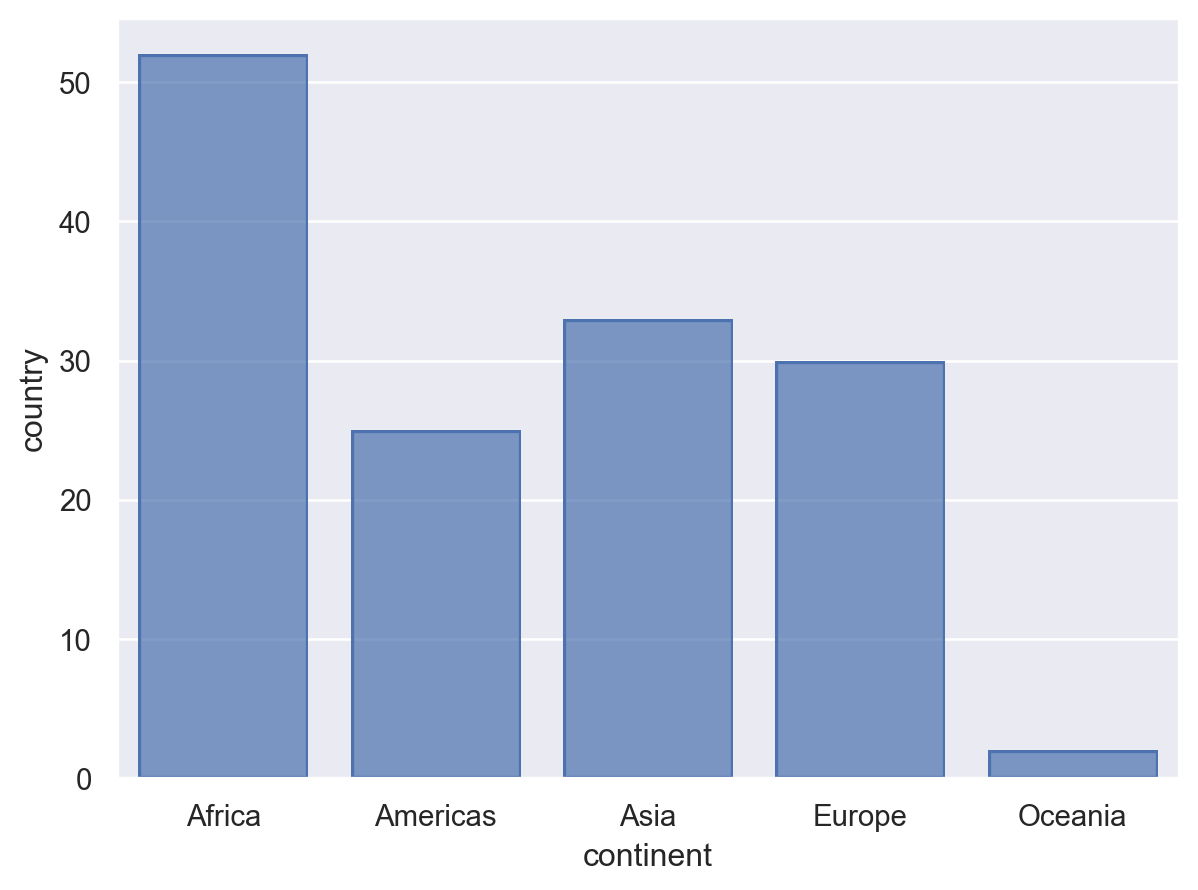

In [36]:
#a2 esta bien!
(
    so.Plot(data=df, x = "continent", y = "country")
    .add(so.Bar())
)


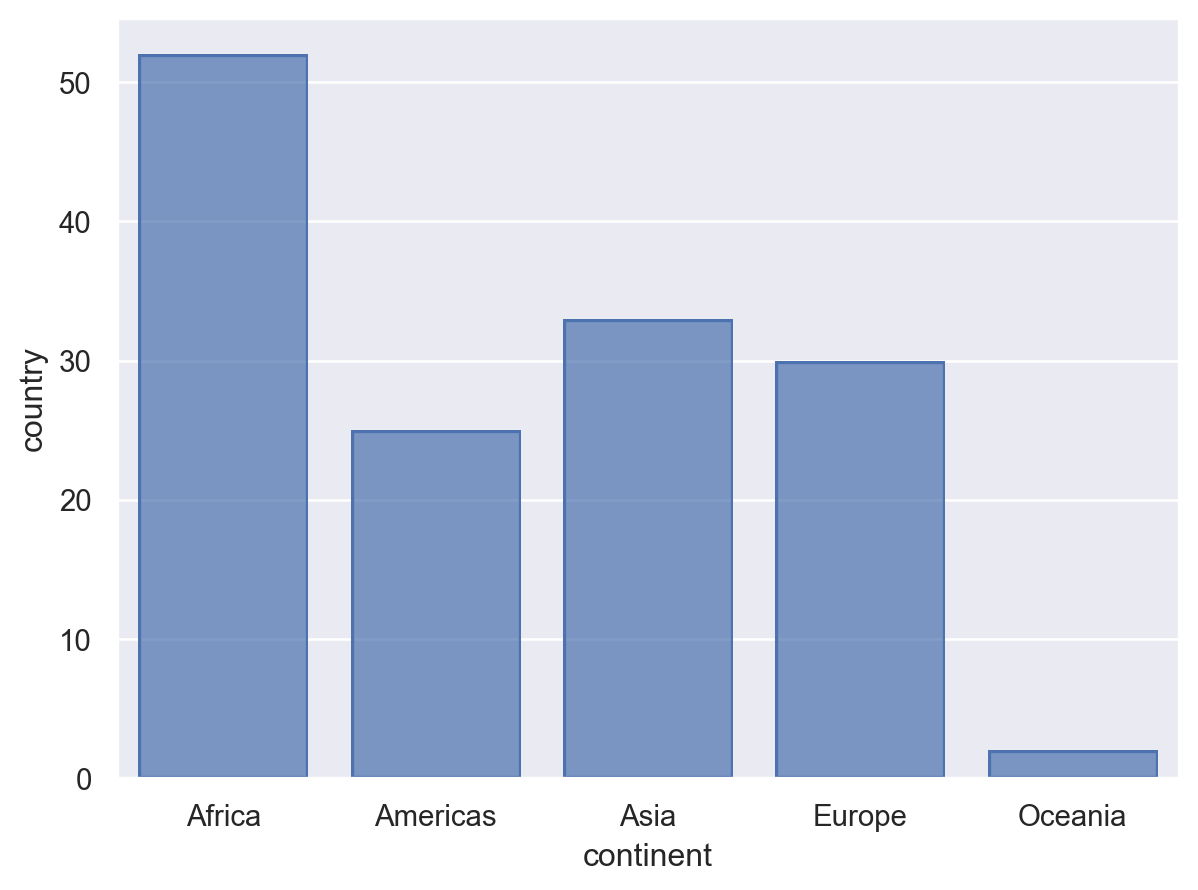

In [37]:
#a esta mal pero ni idea
(
    so.Plot(x = s.index, y = s)
    .add(so.Bar())
)

In [38]:
gapminder["pais_unico"] = 1 - gapminder.country.duplicated()

In [39]:

assert np.all(gapminder.groupby("country").pais_unico.sum() == 1)

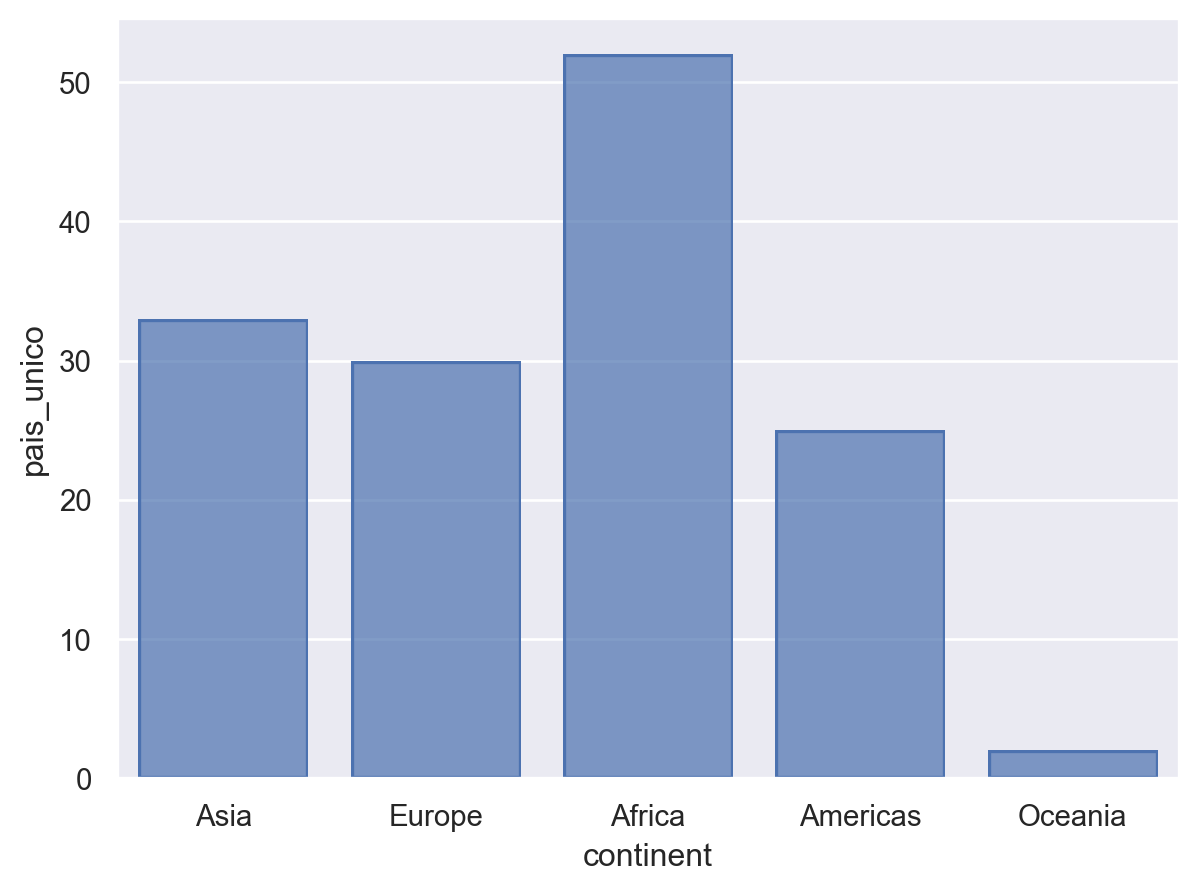

In [40]:
#a2 esta bien!
(
    so.Plot(data=gapminder, x = "continent", y = "pais_unico")
    .add(so.Bar(), so.Agg("sum"))
)

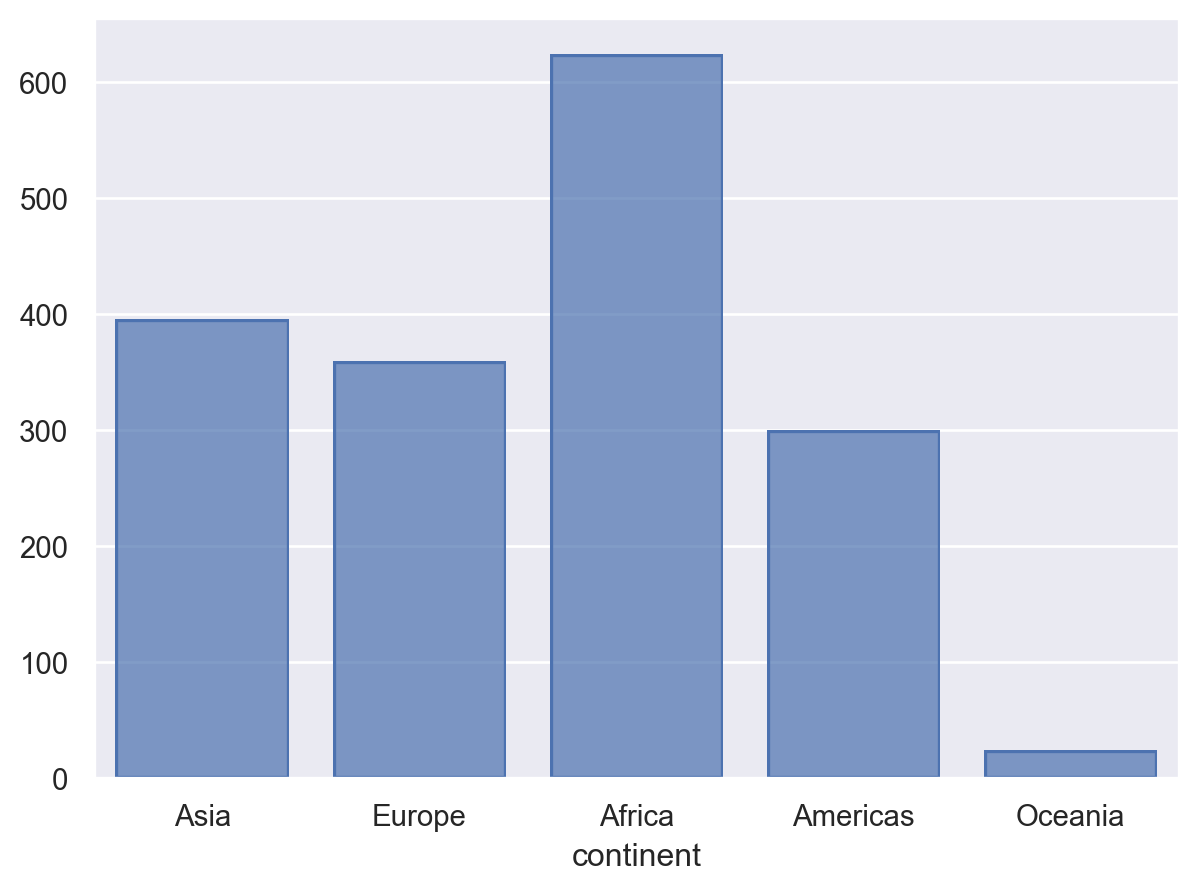

In [41]:
#b
(
    so.Plot(data = gapminder, x = "continent")
    .add(so.Bar(), so.Hist())
    )

# Ejercicio 13

In [42]:
import seaborn as sns
sns.boxplot ( gapminder, x ="continent", y = "lifeExp" , order = sorted( COMPLETAR) )

NameError: name 'COMPLETAR' is not defined